### 실습과제 1 : Smarket dataset

In [174]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

np.warnings.filterwarnings('ignore')
%matplotlib inline

In [107]:
#1. Smarket data를 로드 하여 변수명 df로 저장하고, 상위 5개의 row를 출력하라.
df = pd.read_csv('../data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [180]:
df = pd.read_csv("./Smarket.csv")
df = df.drop(columns=['Unnamed: 0'])
df['Year'] = df['Year'].astype(str)
df['Year'] = pd.to_datetime(df['Year'])
df.set_index('Year', inplace = True)
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [110]:
#2. 종속변수를 Direction이라 하자. 범주별 개수를 출력하라.

Up      648
Down    602
Name: Direction, dtype: int64

In [181]:
df['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

In [111]:
#3. 데이터의 Column 정보, Null 값의 개수, 데이터의 타입 등을 출력하라.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2001-01-01 to 2005-01-01
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lag1       1250 non-null   float64
 1   Lag2       1250 non-null   float64
 2   Lag3       1250 non-null   float64
 3   Lag4       1250 non-null   float64
 4   Lag5       1250 non-null   float64
 5   Volume     1250 non-null   float64
 6   Today      1250 non-null   float64
 7   Direction  1250 non-null   object 
dtypes: float64(7), object(1)
memory usage: 87.9+ KB


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1250 entries, 2001-01-01 to 2005-01-01
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lag1       1250 non-null   float64
 1   Lag2       1250 non-null   float64
 2   Lag3       1250 non-null   float64
 3   Lag4       1250 non-null   float64
 4   Lag5       1250 non-null   float64
 5   Volume     1250 non-null   float64
 6   Today      1250 non-null   float64
 7   Direction  1250 non-null   object 
dtypes: float64(7), object(1)
memory usage: 87.9+ KB


In [115]:
#4. Direction의 각 범주에 따른 변수 'Today' 값의 평균을 계산하라.

Direction
Down   -0.857814
Up      0.802974
Name: Today, dtype: float64

In [183]:
df.groupby(by = "Direction").mean()['Today']

Direction
Down   -0.857814
Up      0.802974
Name: Today, dtype: float64

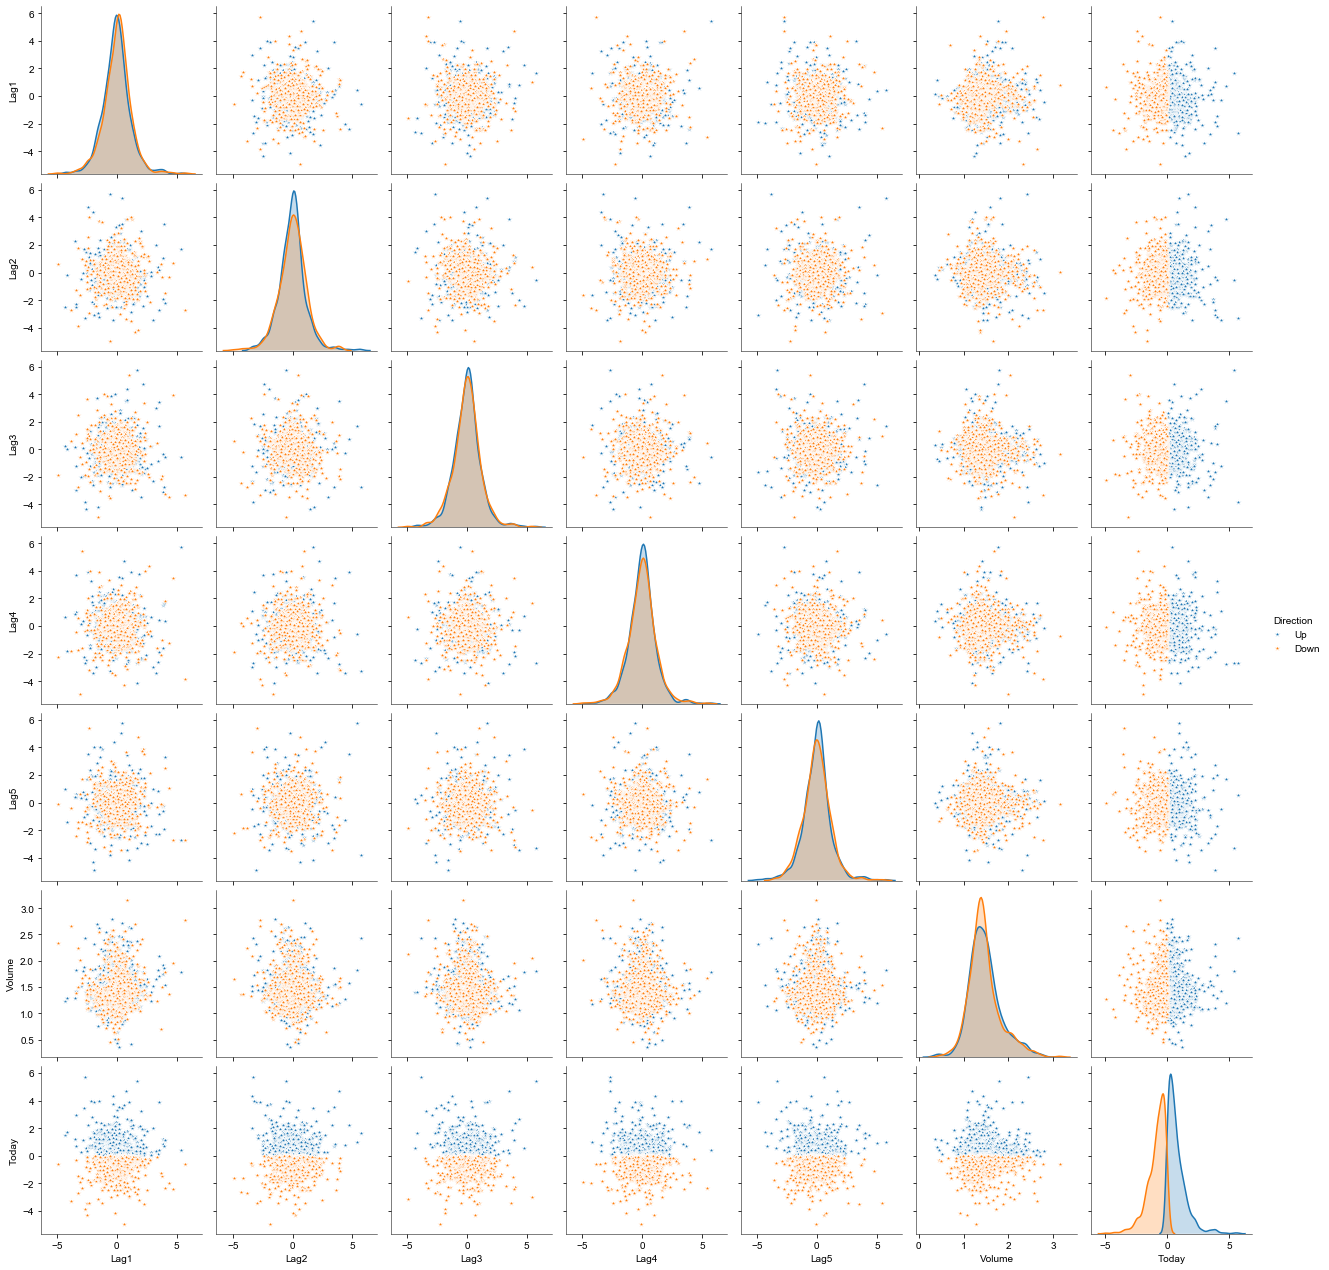

In [112]:
#5. Pairplot를 활용하여 변수간의 관계를 파악하라. 유의미한 변수가 존재하는가?

KeyboardInterrupt: 

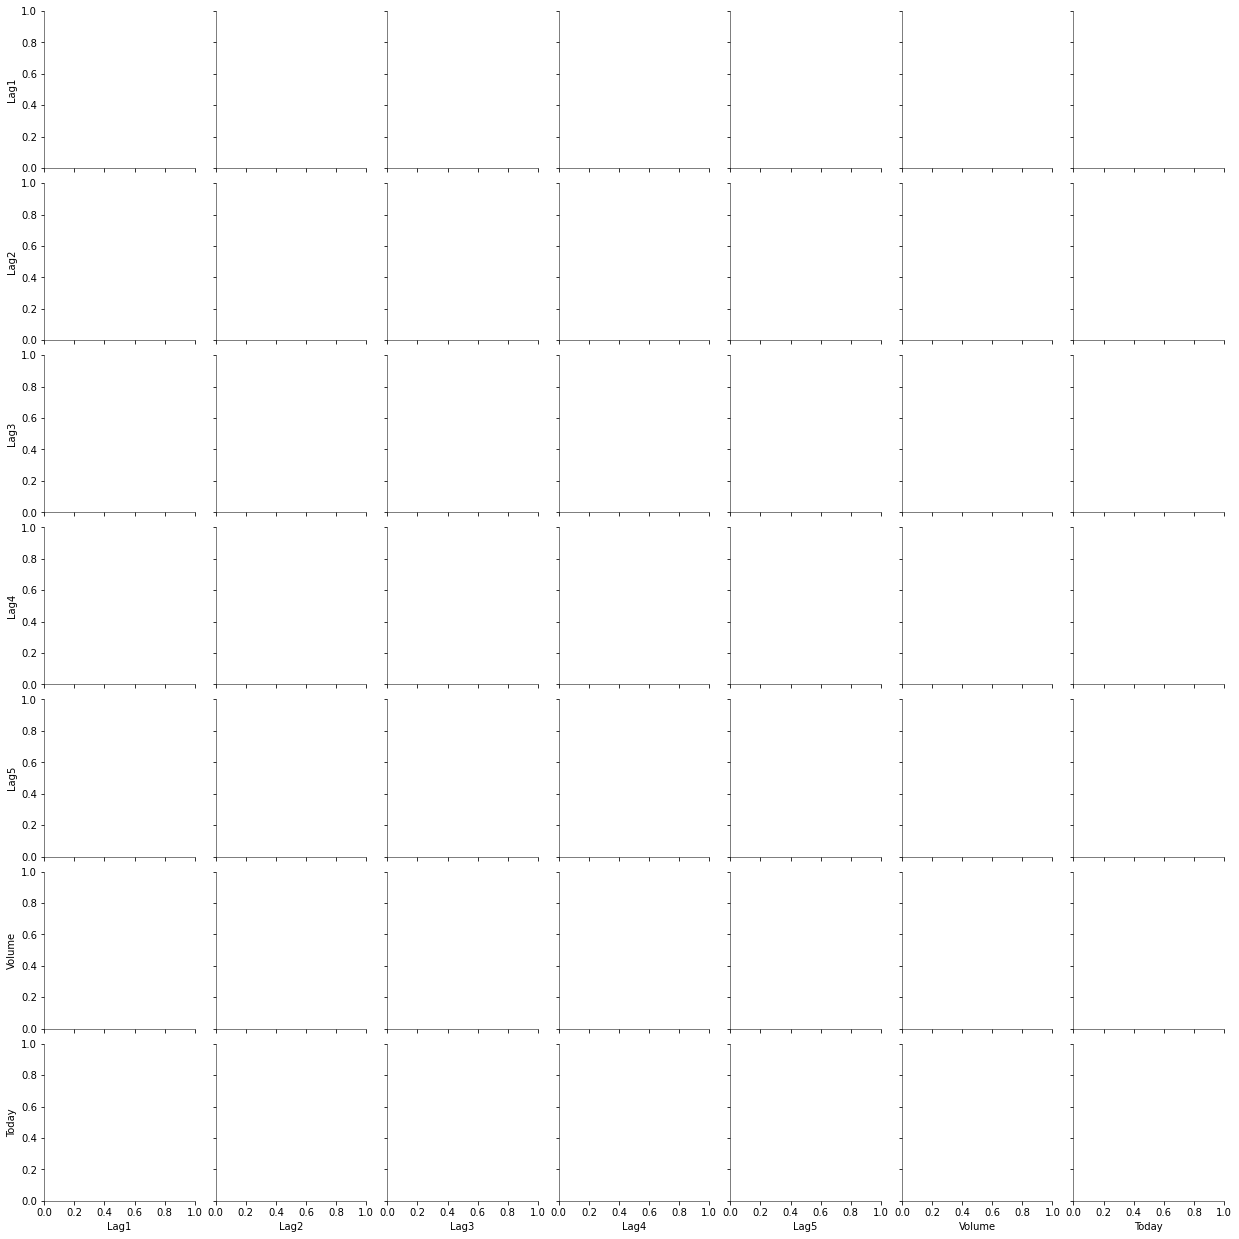

In [179]:
sns.pairplot(df, hue='Direction', markers='*')
plt.show()

In [116]:
#6.  X_train, y_train, X_test, y_test를 각각 구성하라.
# Train_set : Year 기준 2004년까지의 data.
# Test_set : Year 기준 2005년부터의 data.
# Hint: Use df[:'2004']

In [184]:
X_train = df[:'2004'].drop('Direction', axis = 1)
y_train = df[:'2004']['Direction']
X_test = df['2005':].drop('Direction', axis = 1)
y_test = df['2005':]['Direction']

In [117]:
#7. 각 X_train의 마지막 5개의 행과, X_test의 상위 5개의 행을 출력하라.

             Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today
Year                                                        
2004-01-01  0.046  0.342  0.904  0.038 -0.749  0.9561 -0.431
2004-01-01 -0.431  0.046  0.342  0.904  0.038  0.9220  0.715
2004-01-01  0.715 -0.431  0.046  0.342  0.904  0.9830 -0.007
2004-01-01 -0.007  0.715 -0.431  0.046  0.342  0.9259  0.008
2004-01-01  0.008 -0.007  0.715 -0.431  0.046  0.8298 -0.134
             Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today
Year                                                        
2005-01-01 -0.134  0.008 -0.007  0.715 -0.431  0.7869 -0.812
2005-01-01 -0.812 -0.134  0.008 -0.007  0.715  1.5108 -1.167
2005-01-01 -1.167 -0.812 -0.134  0.008 -0.007  1.7210 -0.363
2005-01-01 -0.363 -1.167 -0.812 -0.134  0.008  1.7389  0.351
2005-01-01  0.351 -0.363 -1.167 -0.812 -0.134  1.5691 -0.143


In [185]:
print(X_train.tail())
print(X_test.head())

             Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today
Year                                                        
2004-01-01  0.046  0.342  0.904  0.038 -0.749  0.9561 -0.431
2004-01-01 -0.431  0.046  0.342  0.904  0.038  0.9220  0.715
2004-01-01  0.715 -0.431  0.046  0.342  0.904  0.9830 -0.007
2004-01-01 -0.007  0.715 -0.431  0.046  0.342  0.9259  0.008
2004-01-01  0.008 -0.007  0.715 -0.431  0.046  0.8298 -0.134
             Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today
Year                                                        
2005-01-01 -0.134  0.008 -0.007  0.715 -0.431  0.7869 -0.812
2005-01-01 -0.812 -0.134  0.008 -0.007  0.715  1.5108 -1.167
2005-01-01 -1.167 -0.812 -0.134  0.008 -0.007  1.7210 -0.363
2005-01-01 -0.363 -1.167 -0.812 -0.134  0.008  1.7389  0.351
2005-01-01  0.351 -0.363 -1.167 -0.812 -0.134  1.5691 -0.143


In [130]:
#8. LDA model를 정의하고 train data를 활용하여 학습하고 추정된 범주별 분포의 평균과 공분산을 출력하라.

means : [[ 4.27902240e-02  3.38940937e-02 -9.80651731e-03 -1.05987780e-02
   4.36659878e-03  1.37184259e+00 -9.22934827e-01]
 [-3.95463511e-02 -3.13254438e-02  5.83431953e-03  3.11045365e-03
  -6.50887574e-04  1.36320990e+00  8.94686391e-01]]
covariance : [[ 1.50886781 -0.03340234 -0.01577858 -0.00325979 -0.00594073  0.01802727
   0.00541689]
 [-0.03340234  1.5095363  -0.03129822 -0.01567876 -0.00458898 -0.02030764
   0.0145286 ]
 [-0.01577858 -0.03129822  1.51743452 -0.02883606 -0.02905761 -0.02167745
  -0.01034327]
 [-0.00325979 -0.01567876 -0.02883606  1.51804195 -0.03373927 -0.02679697
  -0.01391682]
 [-0.00594073 -0.00458898 -0.02905761 -0.03373927  1.5430568  -0.01221196
  -0.05818884]
 [ 0.01802727 -0.02030764 -0.02167745 -0.02679697 -0.01221196  0.07152843
   0.00523991]
 [ 0.00541689  0.0145286  -0.01034327 -0.01391682 -0.05818884  0.00523991
   0.68471103]]


In [186]:
lda_model = LinearDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)
y_pred = lda_model.predict(X_test)
y_train_pred= lda_model.predict(X_train)

means = lda_model.means_
cov = lda_model.covariance_
print("means :", means)
print("covariance :", cov)

means : [[ 4.27902240e-02  3.38940937e-02 -9.80651731e-03 -1.05987780e-02
   4.36659878e-03  1.37184259e+00 -9.22934827e-01]
 [-3.95463511e-02 -3.13254438e-02  5.83431953e-03  3.11045365e-03
  -6.50887574e-04  1.36320990e+00  8.94686391e-01]]
covariance : [[ 1.50886781 -0.03340234 -0.01577858 -0.00325979 -0.00594073  0.01802727
   0.00541689]
 [-0.03340234  1.5095363  -0.03129822 -0.01567876 -0.00458898 -0.02030764
   0.0145286 ]
 [-0.01577858 -0.03129822  1.51743452 -0.02883606 -0.02905761 -0.02167745
  -0.01034327]
 [-0.00325979 -0.01567876 -0.02883606  1.51804195 -0.03373927 -0.02679697
  -0.01391682]
 [-0.00594073 -0.00458898 -0.02905761 -0.03373927  1.5430568  -0.01221196
  -0.05818884]
 [ 0.01802727 -0.02030764 -0.02167745 -0.02679697 -0.01221196  0.07152843
   0.00523991]
 [ 0.00541689  0.0145286  -0.01034327 -0.01391682 -0.05818884  0.00523991
   0.68471103]]


In [120]:
#9. train과 test set 각각에 대해 train accuracy와 test accuracy를 계산하라.

Train acc of LDA :  0.9859719438877755
Test acc of LDA :  0.9682539682539683


In [187]:
lda_train_acc = accuracy_score(y_train, y_train_pred)
lda_test_acc = accuracy_score(y_test, y_pred)
print("Train acc of LDA :",lda_train_acc)
print("Test acc of LDA :",lda_test_acc)

Train acc of LDA : 0.9859719438877755
Test acc of LDA : 0.9682539682539683


In [131]:
#10. QDA model를 정의하고 train data를 활용하여 학습하고 추정된 범주별 분포의 평균을 출력하라.

means : [[ 4.27902240e-02  3.38940937e-02 -9.80651731e-03 -1.05987780e-02
   4.36659878e-03  1.37184259e+00 -9.22934827e-01]
 [-3.95463511e-02 -3.13254438e-02  5.83431953e-03  3.11045365e-03
  -6.50887574e-04  1.36320990e+00  8.94686391e-01]]
covariance : [array([[ 1.50662277, -0.03924806, -0.1161981 ,  0.02773081,  0.10375151,
         0.01264993,  0.11718046],
       [-0.03924806,  1.53559498, -0.05837697,  0.00911436,  0.00535896,
        -0.02853927,  0.13942748],
       [-0.1161981 , -0.05837697,  1.5261648 ,  0.02759497, -0.0866616 ,
        -0.02793508,  0.01605278],
       [ 0.02773081,  0.00911436,  0.02759497,  1.60391547, -0.08697959,
        -0.03358478,  0.01683095],
       [ 0.10375151,  0.00535896, -0.0866616 , -0.08697959,  1.44963901,
         0.00287333,  0.02445059],
       [ 0.01264993, -0.02853927, -0.02793508, -0.03358478,  0.00287333,
         0.0758683 , -0.02145958],
       [ 0.11718046,  0.13942748,  0.01605278,  0.01683095,  0.02445059,
        -0.02145958,  

In [188]:
qda_model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)
qda_model.fit(X_train, y_train)
y_pred = qda_model.predict(X_test)
y_train_pred= qda_model.predict(X_train)

means = qda_model.means_
cov = qda_model.covariance_
print("means :", means)
print("covariance :", cov)

means : [[ 4.27902240e-02  3.38940937e-02 -9.80651731e-03 -1.05987780e-02
   4.36659878e-03  1.37184259e+00 -9.22934827e-01]
 [-3.95463511e-02 -3.13254438e-02  5.83431953e-03  3.11045365e-03
  -6.50887574e-04  1.36320990e+00  8.94686391e-01]]
covariance : [array([[ 1.50662277, -0.03924806, -0.1161981 ,  0.02773081,  0.10375151,
         0.01264993,  0.11718046],
       [-0.03924806,  1.53559498, -0.05837697,  0.00911436,  0.00535896,
        -0.02853927,  0.13942748],
       [-0.1161981 , -0.05837697,  1.5261648 ,  0.02759497, -0.0866616 ,
        -0.02793508,  0.01605278],
       [ 0.02773081,  0.00911436,  0.02759497,  1.60391547, -0.08697959,
        -0.03358478,  0.01683095],
       [ 0.10375151,  0.00535896, -0.0866616 , -0.08697959,  1.44963901,
         0.00287333,  0.02445059],
       [ 0.01264993, -0.02853927, -0.02793508, -0.03358478,  0.00287333,
         0.0758683 , -0.02145958],
       [ 0.11718046,  0.13942748,  0.01605278,  0.01683095,  0.02445059,
        -0.02145958,  

In [132]:
#11. train과 test set 각각에 대해 train accuracy와 test accuracy를 계산하라.

Train acc of QDA :  0.9719438877755511
Test acc of QDA :  0.9285714285714286


In [189]:
qda_train_acc = accuracy_score(y_train, y_train_pred)
qda_test_acc = accuracy_score(y_test, y_pred)
print("Train acc of LDA :",qda_train_acc)
print("Test acc of LDA :",qda_test_acc)

Train acc of LDA : 0.9719438877755511
Test acc of LDA : 0.9285714285714286


In [133]:
#12. 5번의 Pairplot을 바탕으로 하나의 독립변수만을 선택하여 LDA 모델을 다시 학습하고, 그때의 accuracy를 출력하라.

Train acc with single variable :  0.9879759519038076
Test acc with single variable :  0.9920634920634921


In [190]:
X_train = df[:'2004'][['Today']]
y_train = df[:'2004']['Direction']
X_test = df['2005':][['Today']]
y_test = df['2005':]['Direction']

lda_model = LinearDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)
y_pred = lda_model.predict(X_test)
y_train_pred= lda_model.predict(X_train)

lda_train_acc = accuracy_score(y_train, y_train_pred)
lda_test_acc = accuracy_score(y_test, y_pred)
print("Train acc with single variable :",lda_train_acc)
print("Test acc with single variable :",lda_test_acc)

Train acc with single variable : 0.9879759519038076
Test acc with single variable : 0.9920634920634921


실습과제 2 : Vowel Speech Recognition 2

In [191]:
#Recall the Vowel problem
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

np.warnings.filterwarnings('ignore')
%matplotlib inline

# set common plots properties and define commonly used colors
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
BLUE, ORANGE, GRAY1, GRAY4 = '#57B5E8', '#E69E00', '#231F20', '#646369'


In [5]:
#13. vowel data를 로드하여 변수명 df로 저장하고 반응변수의 범위를 0-10으로 수정하라.
#df의 상위 5개의 row를 출력하라.

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,is_train
0,1,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,2,1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,3,2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,1
3,4,3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,1
4,5,4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,1


In [192]:
df = pd.read_csv("./Vowel.txt")
df.y = df.y - 1
df.head()

,row.names,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,is_train
0,1,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,2,1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,3,2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,1
3,4,3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,1
4,5,4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,1


In [6]:
#14. predictor를 리스트 형태로 변수명 features에 저장 후 출력하라.
features

['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']

In [193]:
features = [f'x.{i+1}' for i in range(10)]
features

['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10']

In [7]:
#15. is_train을 column을 활용하여 train과 test set을 구성하라.(test set: is_train == 0 )
#이를 바탕으로 X_train, y_train, X_test, y_test를 구성하라.
#X_train과 X_test의 개수를 출력하라.

X_train: 528
X_test: 462


In [194]:
df_train, df_test = df[df.is_train == 1], df[df.is_train == 0]
X_train, y_train = df_train[features].values, df_train.y.values
X_test, y_test = df_test[features].values, df_test.y.values
print("X_train:",X_train.shape[0])
print("X_test:",X_test.shape[0])

X_train: 528
X_test: 462


In [139]:
#16. LDA 모델을 학습하고 accuracy를 계산하라. (use n_components = 2)

Train acc of LDA :  0.6837121212121212
Test acc of LDA :  0.44372294372294374


In [195]:
lda = LinearDiscriminantAnalysis(n_components=2).fit(X_train, y_train)
y_pred = lda.predict(X_test)
y_train_pred= lda.predict(X_train)
lda_train_acc = accuracy_score(y_train, y_train_pred)
lda_test_acc = accuracy_score(y_test, y_pred)
print('Train acc of LDA: ' ,lda_train_acc)
print('test acc of LDA: ' ,lda_test_acc)

Train acc of LDA:  0.6837121212121212
test acc of LDA:  0.44372294372294374


In [145]:
#17. Test data에 대해 각 범주별 평균을 출력하라.

,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,-3.310071,-0.016429,-0.363857,1.579476,0.302905,1.214810,-0.153000,0.112000,-0.648786,-0.068167
1,-3.210929,0.983143,-0.422571,1.136714,0.385048,0.871500,-0.085452,0.212476,-0.538119,-0.008714
2,-2.615476,1.135262,-0.685643,0.818452,-0.002190,0.343905,-0.116143,0.099714,-0.405143,0.137976
3,-2.300357,1.752357,-0.828310,0.221190,-0.404667,0.256452,-0.015452,0.098214,-0.190405,-0.032952
4,-2.761333,2.796833,-0.956595,-0.022286,-0.604024,0.774762,0.010714,0.144571,-0.187548,-0.051429
5,-2.742071,2.163619,-0.576857,0.155476,-0.300929,0.587905,0.000929,0.113690,-0.264357,-0.018810
6,-3.083429,2.838476,-0.658214,0.029667,-0.569905,0.775976,0.202405,0.267500,-0.348262,-0.078238
7,-3.837476,3.725262,-0.703143,-0.320071,-0.773762,0.730595,0.265119,0.751643,-0.070095,-0.190167
8,-3.985857,2.834214,-0.460167,0.349643,-0.264262,0.717619,0.006095,0.421500,-0.233548,-0.144714


In [196]:
test_mean = df_test.groupby(by = "y").mean()[features]
test_mean

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
y,,,,,,,,,,
0,-3.310071,-0.016429,-0.363857,1.579476,0.302905,1.214810,-0.153000,0.112000,-0.648786,-0.068167
1,-3.210929,0.983143,-0.422571,1.136714,0.385048,0.871500,-0.085452,0.212476,-0.538119,-0.008714
2,-2.615476,1.135262,-0.685643,0.818452,-0.002190,0.343905,-0.116143,0.099714,-0.405143,0.137976
3,-2.300357,1.752357,-0.828310,0.221190,-0.404667,0.256452,-0.015452,0.098214,-0.190405,-0.032952
4,-2.761333,2.796833,-0.956595,-0.022286,-0.604024,0.774762,0.010714,0.144571,-0.187548,-0.051429
5,-2.742071,2.163619,-0.576857,0.155476,-0.300929,0.587905,0.000929,0.113690,-0.264357,-0.018810
6,-3.083429,2.838476,-0.658214,0.029667,-0.569905,0.775976,0.202405,0.267500,-0.348262,-0.078238
7,-3.837476,3.725262,-0.703143,-0.320071,-0.773762,0.730595,0.265119,0.751643,-0.070095,-0.190167
8,-3.985857,2.834214,-0.460167,0.349643,-0.264262,0.717619,0.006095,0.421500,-0.233548,-0.144714


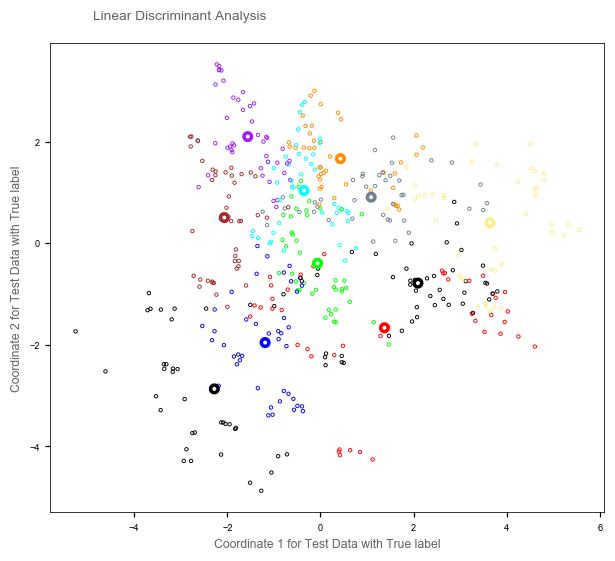

In [146]:
#18. Test data와 Test data의 범주를 활용하여 2차원 plot하라.

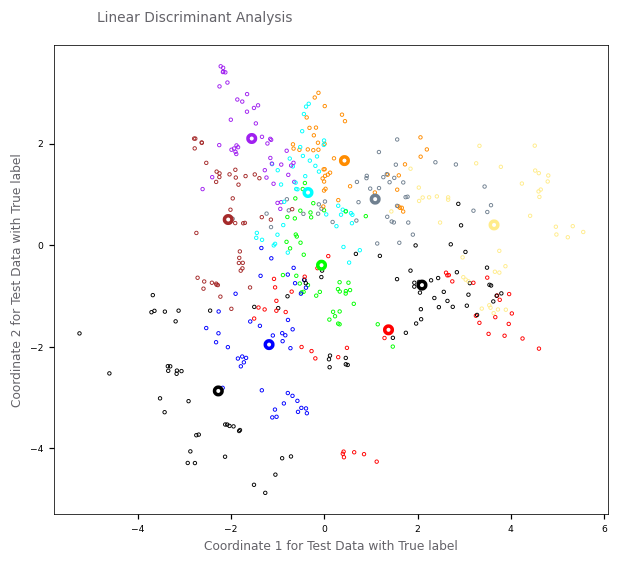

In [197]:
#18. Complete the code below
X_reduced = lda.transform(X_test)
means = lda.transform(test_mean)

colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])
fig, ax = plt.subplots(figsize=(6.5, 5.65), dpi=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], facecolors='none',
           edgecolors=colors[y_test], s=5, linewidth=0.6)
ax.scatter(means[:, 0], means[:, 1], facecolors='none', edgecolors=colors,
           s=5, linewidth=5)
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(6)
ax.text(-4.89, 4.4, 'Linear Discriminant Analysis', color=GRAY4, fontsize=9)
ax.set_xlabel('Coordinate 1 for Test Data with True label', color=GRAY4, fontsize=8)
_ = ax.set_ylabel('Coordinate 2 for Test Data with True label', color=GRAY4, fontsize=8)

In [147]:
#19. Test data를 통해 범주를 예측하고, 예측한 범주 값을 활용하여 Test data에 대한 각 범주별 평균을 출력하라.

,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,-3.355746,0.358661,-0.577373,1.469831,0.248831,1.406915,0.049661,0.255254,-0.695492,-0.357186
1,-3.095585,0.943951,-0.213317,0.956927,0.466951,0.613732,-0.326366,-0.001390,-0.534976,0.267488
2,-3.025588,1.513412,-0.643176,1.012441,0.274824,0.251265,-0.309647,-0.013559,-0.545853,0.414382
3,-2.235958,1.624333,-0.803979,0.349708,-0.386271,0.191833,-0.091479,0.168854,-0.168292,-0.064812
4,-2.818920,2.754960,-0.791160,-0.255560,-0.713640,0.860200,0.213800,0.411000,-0.476560,-0.338120
5,-2.970133,2.522960,-0.862027,0.358800,-0.325533,0.663413,0.012533,-0.240973,-0.522760,0.455987
6,-3.033750,2.729958,-0.314958,-0.026208,-0.741208,0.368708,0.199667,0.597125,0.250667,-0.458375
7,-3.844424,3.647848,-0.307818,-0.159758,-1.025061,0.467727,0.124970,0.935364,0.157788,-0.103576
8,-3.969098,2.711732,-0.184366,0.155732,-0.384585,0.871610,-0.094707,0.489732,-0.347976,-0.172439


In [198]:
pred_mean = df_test.groupby(by = y_pred).mean()[features]
pred_mean

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,-3.355746,0.358661,-0.577373,1.469831,0.248831,1.406915,0.049661,0.255254,-0.695492,-0.357186
1,-3.095585,0.943951,-0.213317,0.956927,0.466951,0.613732,-0.326366,-0.001390,-0.534976,0.267488
2,-3.025588,1.513412,-0.643176,1.012441,0.274824,0.251265,-0.309647,-0.013559,-0.545853,0.414382
3,-2.235958,1.624333,-0.803979,0.349708,-0.386271,0.191833,-0.091479,0.168854,-0.168292,-0.064813
4,-2.818920,2.754960,-0.791160,-0.255560,-0.713640,0.860200,0.213800,0.411000,-0.476560,-0.338120
5,-2.970133,2.522960,-0.862027,0.358800,-0.325533,0.663413,0.012533,-0.240973,-0.522760,0.455987
6,-3.033750,2.729958,-0.314958,-0.026208,-0.741208,0.368708,0.199667,0.597125,0.250667,-0.458375
7,-3.844424,3.647848,-0.307818,-0.159758,-1.025061,0.467727,0.124970,0.935364,0.157788,-0.103576
8,-3.969098,2.711732,-0.184366,0.155732,-0.384585,0.871610,-0.094707,0.489732,-0.347976,-0.172439
9,-4.205806,3.188333,-0.866778,0.331500,-0.283778,0.873583,0.300250,0.466083,0.079167,-0.427056


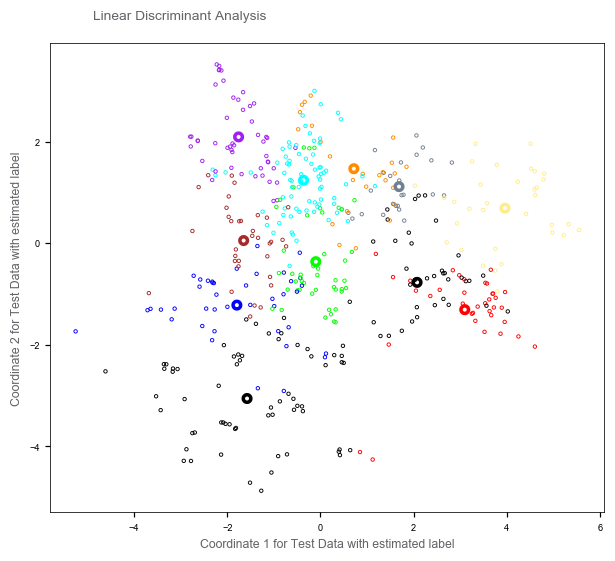

In [148]:
#20. 추정된 Test data의 범주를 활용하여, 추정 범주별 test data를 2차원 plot하라.

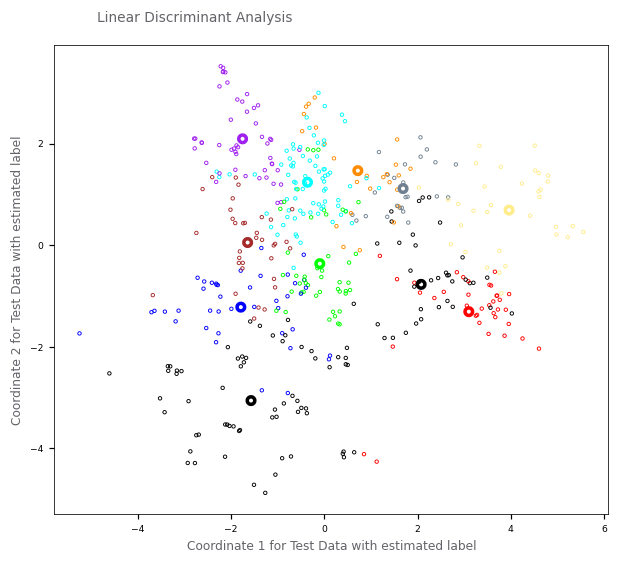

In [199]:
#20. Complete the code below

X_reduced = lda.transform(X_test)
means = lda.transform(pred_mean)

colors = np.array([
    '#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
    '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])
fig, ax = plt.subplots(figsize=(6.5, 5.65), dpi=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], facecolors='none',
           edgecolors=colors[y_pred], s=5, linewidth=0.6)
ax.scatter(means[:, 0], means[:, 1], facecolors='none', edgecolors=colors,
           s=5, linewidth=5)
for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(6)
ax.text(-4.89, 4.4, 'Linear Discriminant Analysis', color=GRAY4, fontsize=9)
ax.set_xlabel('Coordinate 1 for Test Data with estimated label', color=GRAY4, fontsize=8)
_ = ax.set_ylabel('Coordinate 2 for Test Data with estimated label', color=GRAY4, fontsize=8)